<a href="https://colab.research.google.com/github/Achyran/Achyran-TensorFlowNotes/blob/master/01_Nural_Network_regession_with_Tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction intro Regression with Nural Networks ind Tenserflow

There are many deffineitions for regressin problems but in our case, we are going to smplefy it: predicting a numeriacal varable based on some other combination of varables, even shorter... Predicting a number.

In [ ]:
#Improt Tenserflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.17.1


## Creating some date ato view and fit

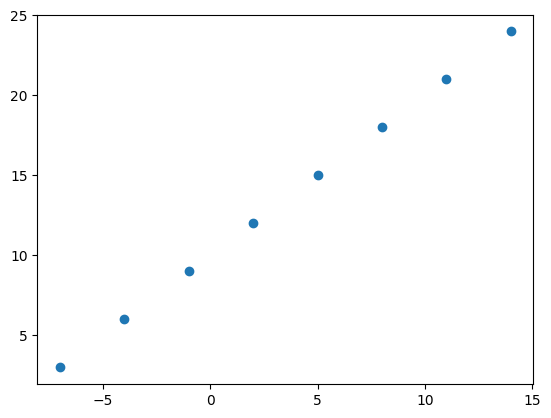

In [ ]:
# Create the features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Crate labes
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualise it
plt.scatter(X,y)

In [ ]:
# Relation we wannt to learn

y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Outputshapes

In [ ]:
# Create a demo tensor for our Houseing Price Prediction Problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays int tensors
X = tf.constant(X)
y = tf.constant(y)
# increesing the speed by using a more optimised data type
X = tf.cast(X,dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape
#If the tensors are scalares they dont have a shape

(TensorShape([]), TensorShape([]))

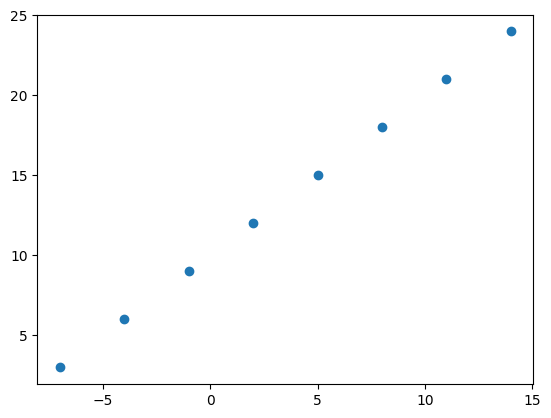

In [ ]:
plt.scatter(X,y)

## Steps in modelling with tensorflow

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Complie a model** - define a loss funktion (in other words, the funktion whitch tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learing) and evaluation metrics(what we can use to determen the performance of our model).
3. **Fitting a model** - letting the model find patterns between X,Y or feature and labels

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

#2. Complie the Model
model.compile(loss=tf.keras.losses.mae,  #mae is shor for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradiant descent
              metrics=["mae"]
              )
#3. Fit the model
model.fit( tf.expand_dims(X,axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 21.3377 - mae: 21.3377
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 20.9446 - mae: 20.9446
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 20.5599 - mae: 20.5599
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 20.2786 - mae: 20.2786
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 19.9974 - mae: 19.9974
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 19.7161 - mae: 19.7161
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 19.4349 - mae: 19.4349
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 19.1536 - mae: 19.1536
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 18.8724 - mae: 18.8724
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 18.5911 - mae: 18.5911


In [ ]:
# Checkout X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using ourt model
model.predict(tf.constant([[8.0]]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[-8.482226]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to creat a model

1. **Creating a Model** - here we might add more layers, increase the number of hidden units (all called Nurons) within each hidden layer, change activation funktion of each layer.
2. **Compiling a model** - here we might change the opitmaization function or perhaps the **learnign rate** of the optimazation function.
3. **Fitting a Model** - here we might fit a model for more **epochs** (leave it traing for longer) or on more data (give the model more exampels to learn from)

In [ ]:
#1. Create a model using the Sequential API
#With more layers and a differen activation function
lage_Model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Complie the Model
lage_Model.compile(loss=tf.keras.losses.mae,  #mae is shor for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # Changed the optimiser
              metrics=["mae"]
              )
#3. Fit the model
lage_Model.fit( tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 13.3346 - mae: 13.3346
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 13.2972 - mae: 13.2972
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 13.2599 - mae: 13.2599
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 13.2230 - mae: 13.2230
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 13.1867 - mae: 13.1867
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 13.1505 - mae: 13.1505
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 13.1146 - mae: 13.1146
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 13.0789 - mae: 13.0789
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 13.0435 - mae: 13.0435
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 13.0083 - mae: 13.0083
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 12.9737 - mae: 12.9737
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 12.9404 - mae: 12.9404
Epoch 13/100
1/1 ━━

In [ ]:
# Try and make a prediction using ourt model
lage_Model.predict(tf.expand_dims([8.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


array([[5.5447507]], dtype=float32)

In [ ]:
# Rebuild our model

#1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )

# Fit the model (thistime we will train longer)
# Expanding the dimmensions from 0 to 1 (befor we expanded the dimensions form 0 to one more than x)
model.fit(tf.expand_dims(X,axis=1),y,epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - loss: 7.8990 - mae: 7.8990
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 7.7665 - mae: 7.7665
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.6340 - mae: 7.6340
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5015 - mae: 7.5015
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.4588 - mae: 7.4588
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4362 - mae: 7.4362
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4306 - mae: 7.4306
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/s

In [ ]:
#Reminder of data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#New model Prediction
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[30.344786]], dtype=float32)

In [ ]:
# Recreating the model again
#1. Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=[1],activation = None))
model.add(tf.keras.layers.Dense(1))

#2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = [tf.keras.losses.mae])

#3. Fitting the model
model.fit(tf.expand_dims(X,1),y,epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.1517 - mean_absolute_error: 12.1517
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step - loss: 11.3839 - mean_absolute_error: 11.3839
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.6145 - mean_absolute_error: 10.6145
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.8428 - mean_absolute_error: 9.8428
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.0668 - mean_absolute_error: 9.0668
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.2838 - mean_absolute_error: 8.2838
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.4901 - mean_absolute_error: 7.4901
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9120 - mean_absolute_error: 6.9120
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.0247 - mean_absolute_error: 7.0247
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.2974 - mean_absolute_error: 7.2974
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33m

In [ ]:
#New model Prediction
model.predict(tf.constant([200.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[215.01674]], dtype=float32)

## Evaluating a Model

In parctice , a typical workflow youll go through when buiding nural nettworks is

Build a model -> fit it -> evaluate it -> fit it -> evaluate it......


When it comes to evaluating you should visualize it


It's a good idea to visualise:
* The data
* The Model
* The Training
* The Predictions

In [ ]:
# Make A bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make Labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

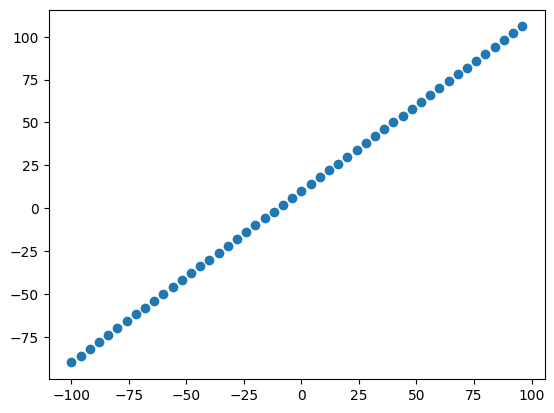

In [ ]:
#Visualise the data
plt.scatter(X,y)

### the 3 setts....

* **Training set** - the model learns for mthis data, which is typically 70-80% of the data
* **Validation set** - the modle gets tuened on this data, which is typicly 10-15%
* **Test set** - the model get evaluated on this data to test what it has learnd, this set is typically 15-10% of the total data availabel

In [ ]:
# Check the lenght of the date we have

len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # frist 40 are traing samples (80%)
y_train = y[:40]
X_test =  X[40:] # Last 10 are testing (20%)
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

### Visualising the data
Now weve got our data in traing and test sets lets visualise it

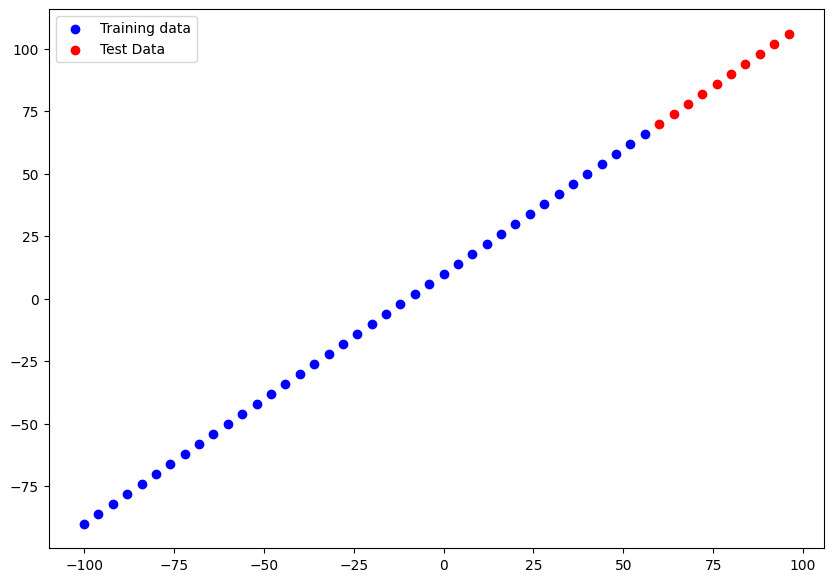

In [ ]:
plt.figure(figsize=(10,7))
#plot traing data in blue
plt.scatter(X_train,y_train,c="b",label= "Training data")
#Plot test data in red
plt.scatter(X_test,y_test,c="r",label ="Test Data")
#Show a legend
plt.legend();

#lets have a look at how we build a nural network for out data


In [ ]:
#1. creat a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fitting the model
model.fit(X_train,y_train, epochs= 100 )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - loss: 66.2999 - mae: 66.2999
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.4625 - mae: 31.4625 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9070 - mae: 8.9070 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3795 - mae: 10.3795 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9183 - mae: 9.9183 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5874 - mae: 11.5874 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5593 - mae: 8.5593 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.0280 - mae: 10.0280 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7330 - mae: 11.7330 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6690 - mae: 8.6690 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1378 - mae: 10.1378 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8786 - mae: 11.8786 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

# Visualizing the model


In [ ]:

#model.summary();

# Lets create a model whitch builds automaticlly by defingin an input shape argument in the first layer

In [ ]:
tf.random.set_seed(42)

#1. create A model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="One_of_Many")

#2 compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae","mse"])

In [ ]:
model.summary();

Model: "One_of_Many"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

* total Prams - total number of parameters in the model
* Trainable params - are teh paramenters the model can update as it trains
* Non-trainable prams- are parameters that cant be updated (this is Typical when you bringin allready learnd Patterns or parameters from other models during ***transfer learning***

**Resource:** http://introtodeeplearning.com/

In [ ]:
model.fit(X_train,y_train,epochs=150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - loss: 46.0288 - mae: 46.0288 - mse: 2936.2095
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39.1018 - mae: 39.1018 - mse: 2216.6899 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.9787 - mae: 33.9787 - mse: 1893.3262 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.9979 - mae: 27.9979 - mse: 1525.6403 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2499 - mae: 21.2499 - mse: 882.0877 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.5995 - mae: 15.5995 - mse: 414.9385 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7212 - mae: 9.7212 - mse: 140.8738   
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3825 - mae: 6.3825 - mse: 66.8258 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3687 - mae: 10.3687 - mse: 122.1806 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1795 - mae: 10.1795 - mse: 118.6904 
Epoch 11/150
2/2 ━━━━━━━━━━

In [ ]:
model.summary()

Model: "One_of_Many"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

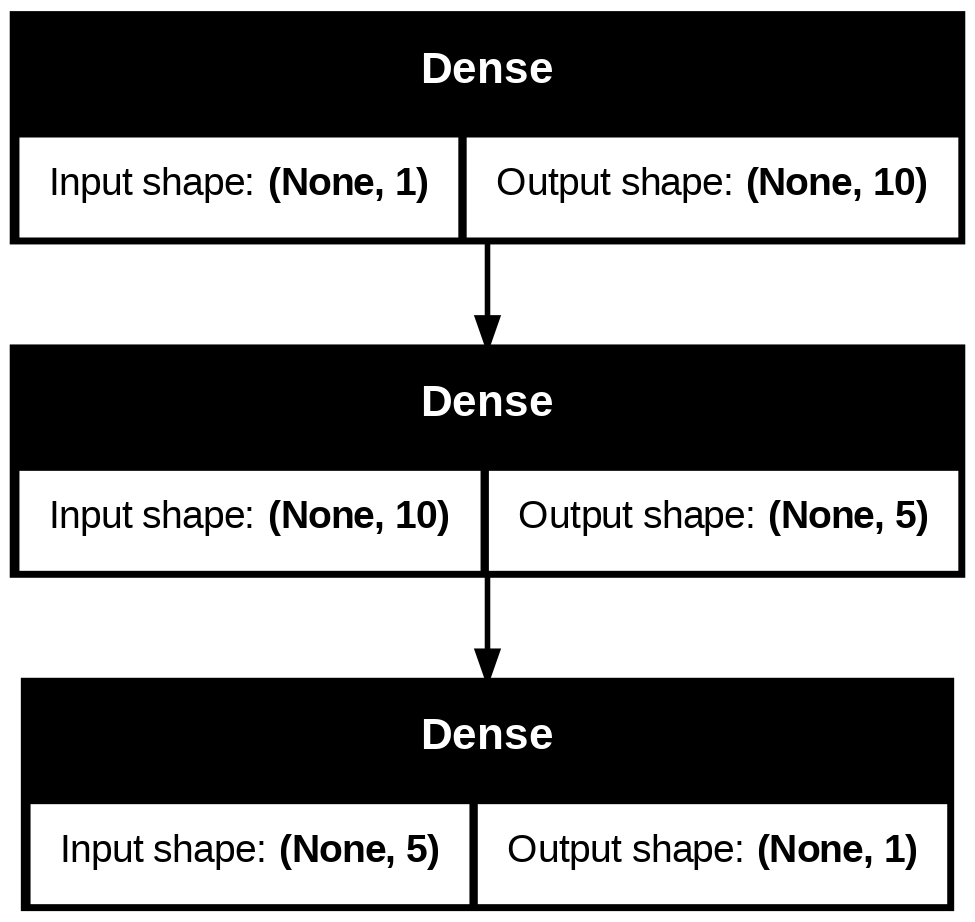

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing our models predictions

To visualising predictions, its a good idea to plot them against the ground truth lable

Often youll see this in the form of y_test or y_true versus y_pred (ground truth versus your models prediction)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


array([[ 68.402725],
       [ 72.30354 ],
       [ 76.20436 ],
       [ 80.10517 ],
       [ 84.00599 ],
       [ 87.9068  ],
       [ 91.80762 ],
       [ 95.70842 ],
       [ 99.60924 ],
       [103.510056]], dtype=float32)

In [ ]:
y_test,X_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

In [ ]:
# Let's create a plotting function

def plot_predictions(predictions,
                     train_data = X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     ):
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b", label="Trainig Data")
  # Plot Testing data
  plt.scatter(test_data,test_labels,c="g", label="Testing Data")
  #Plot models Prediction in red
  plt.scatter(test_data,predictions, c="r", label="Predictions")
  plt.legend()

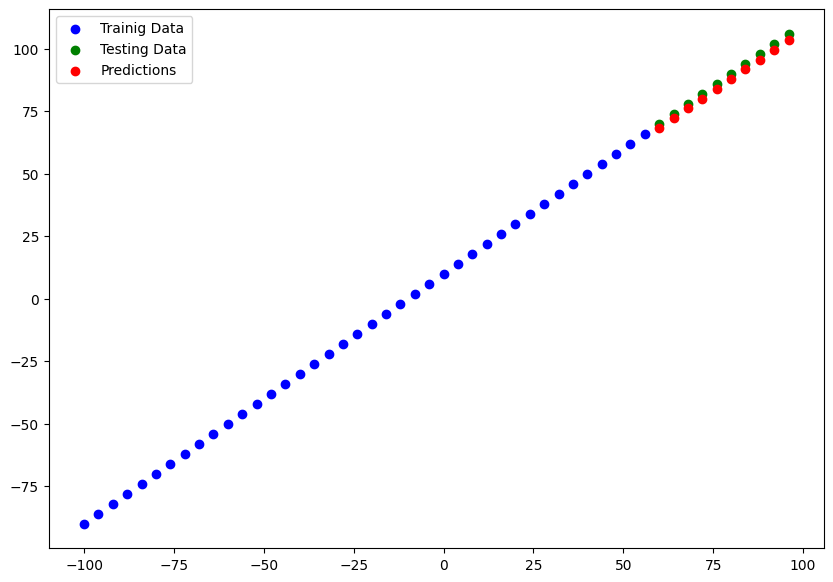

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data= X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our models predictions with regression evalation metrics

Depending on the problem your working on , there will be different evaluation metrics to evaluate your modes performace.

Since were working on a regression, two of the main metrics are
* MEA - mean absolute error, "on average, how wrong is each of my models predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 2.0436 - mae: 2.0436 - mse: 4.2575


[2.0436081886291504, 2.0436081886291504, 4.2574968338012695]

Commparing testners need to bee in the same sape

In [ ]:
# Calculate the mean absolute error
y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)
mae = tf.metrics.mae(y_true=y_test,y_pred= y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0436082>

In [ ]:
# Calculate teh mean Squere error
mse =tf.metrics.mse(y_true=y_test,y_pred= y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.257497>

In [ ]:
# Make some funktion
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_test,y_pred= tf.squeeze(tf.constant( y_pred)) ).numpy()

def mse(y_ture,y_pred):
  return tf.metrics.mse(y_true=y_test,y_pred= tf.squeeze(tf.constant( y_pred)) ).numpy()

### Runngin experimants to improve our models

Models:
1. model_1 1 layer 100 epochs
2. model_2 2 layers 100 epochs
3. model_4 2 layers 150 epochs

In [ ]:
#Set ramdom seed
tf.random.set_seed(42)

#Build model 1
#1 create Model
# Input 0 of layer "dense_34" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,) => fixed by defining inputshape
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
#2. Compile model
model_1.compile( loss=tf.keras.losses.mae,
                 optimizer= tf.keras.optimizers.SGD(),
                 metrics=["mae"])
#3. fit the model
model_1.fit(X_train,y_train,epochs=100, verbose=1)




Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - loss: 37.4426 - mae: 37.4426
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3166 - mae: 8.3166 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0049 - mae: 9.0049 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0232 - mae: 8.0232 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6927 - mae: 9.6927 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0054 - mae: 8.0054 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6810 - mae: 9.6810 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9875 - mae: 7.9875 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6694 - mae: 9.6694 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9697 - mae: 7.9697 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6578 - mae: 9.6578 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9518 - mae: 7.9518 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

In [ ]:
#Set ramdom seed
tf.random.set_seed(42)

#Create model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape= [1]),
    tf.keras.layers.Dense(10, activation="relu" ),
    tf.keras.layers.Dense(10, activation="relu" ),
    tf.keras.layers.Dense(1)
])

#Compile
model_2.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["mse"])
#Fit the model
model_2.fit(X_train,y_train,epochs=400)

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - loss: 42.0121 - mse: 2387.4890
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.3205 - mse: 2191.4976 
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.9354 - mse: 1021.6514
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.7164 - mse: 1909.2695 
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.1505 - mse: 965.3463 
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.6026 - mse: 1798.4482 
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1954 - mse: 899.5028 
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.9155 - mse: 1548.3425 
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.3152 - mse: 620.4484 
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.6237 - mse: 1278.1942 
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3006 - mse: 242.1358
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.3014 - mse: 737.6362 
Epoch 1

In [ ]:
#Set ramdom seed
tf.random.set_seed(42)
#Creating model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#compile model 3
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train,y_train,epochs=500)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - loss: 21.0981 - mae: 21.0981
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1769 - mae: 20.1769 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.6313 - mae: 20.6313 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.3667 - mae: 18.3667 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3798 - mae: 17.3798 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9220 - mae: 11.9220 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7767 - mae: 14.7767 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.5653 - mae: 15.5653 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.6313 - mae: 11.6313 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5925 - mae: 14.5925 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6339 - mae: 15.6339 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8744 - mae: 11.8744 
Epoch 13/500
2/2 ━━━━━━━

In [ ]:
#Make predictions

y_predes_1 =  model_1.predict(X_test)
y_predes_2 =  model_2.predict(X_test)
y_predes_3 =  model_3.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


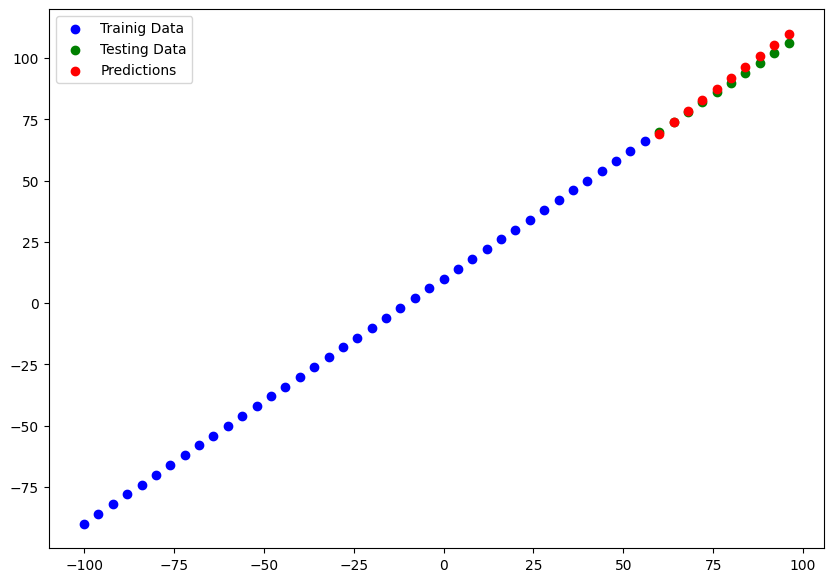

In [ ]:
#Plot model 1
plot_predictions(predictions=y_predes_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_predes_1)
mse_1 = mse(y_test,y_predes_1)
mae_1,mse_1

(1.7799515, 4.727229)

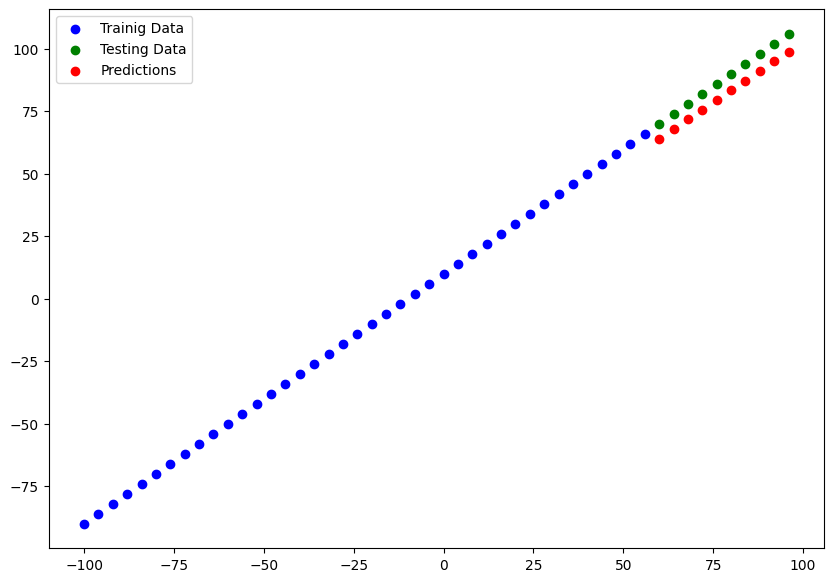

In [ ]:
#Plot model 2
plot_predictions(y_predes_2)

In [ ]:
#Creating evaluation Matrix 2
mae_2 = mae(y_test,y_predes_2)
mse_2 = mse(y_test,y_predes_2)
mae_2,mse_2

(6.527359, 42.769417)

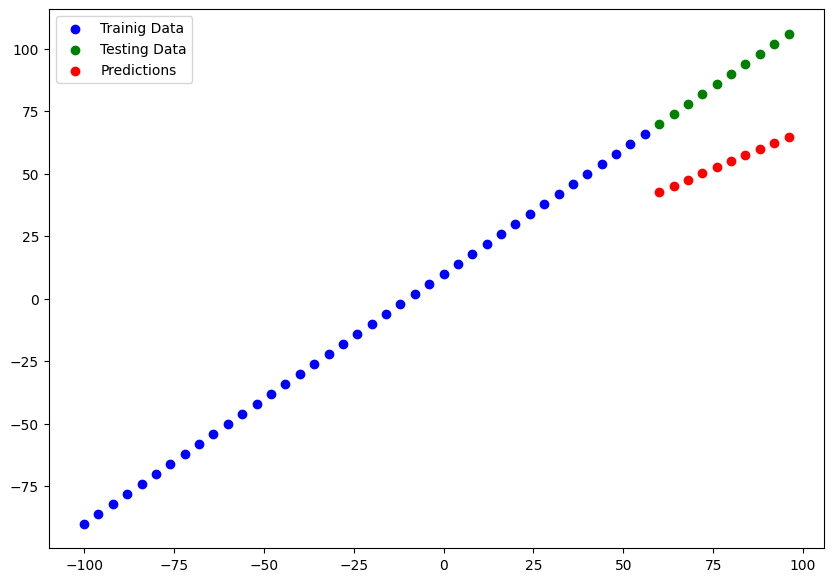

In [ ]:
#ploting model 3
plot_predictions(y_predes_3)

In [ ]:
mae_3 = mae(y_test,y_predes_3)
mse_3 = mse(y_test,y_predes_3)
mae_3,mse_3

(34.21911, 1191.2561)

## Comparing the results of our experimants

weve run a few experimants lets compare them

Start with small models thatn increece when nessesary

In [ ]:
#Lets compare our moders resluts using a panders DataFrame

import pandas as pd
model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,1.779951,4.727229
1,model_2,6.527359,42.769417
2,model_3,34.219109,1191.256104


Looks like model 2 performt the best

In [ ]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1016.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

One of the main gols is to minimise time between expermants

## Tracking yout experimants

One really good habit is to track the results of experimants, this can bee teedius Usefull extantions to help:

* TensorBord - a component of the tenserfolw lib to help track moddeling experimants
* Weights & Biases - a tool to for tracking all kid of mashine learing stuff, and pluggs in to tensorflow

###Saving Models

Saving our Models allows us to use tham wehre ever we want

2 main formats
SavedModel and
HDF5

In [ ]:
#Save a Model unsing Saved Model

model_2.save("Best_Model_SavedModel_Format.keras");

In [ ]:
#Save a Model unsing HTF5

model_2.save("Best_Model_HDF5.h5");

## Loading Model Back in

In [ ]:
# Loading in the saved model format

loaded_SaveModel_format = tf.keras.models.load_model("/content/Best_Model_SavedModel_Format.keras")
loaded_SaveModel_format.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1016.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Comparing Predictions

model2_predictions = model_2.predict(X_test)
loaded_SaveModel_format_predictions = loaded_SaveModel_format.predict(X_test)


model2_predictions == loaded_SaveModel_format_predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#A lager example

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#One Hot encoding
insurance_one_Hot = pd.get_dummies(insurance)
insurance_one_Hot#.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
# Create X & Y values
X = insurance_one_Hot.drop("charges", axis= 1)
y = insurance_one_Hot["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2 ,random_state= 42)

len(X),len(X_train)  ,len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [ ]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1016.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
tf.random.set_seed(42)

#creat a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#Comile model

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#Fit the model
insurance_model.fit(X_train, y_train, epochs= 100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9978.4785 - mae: 9978.4785  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7720.7295 - mae: 7720.7295 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7966.2681 - mae: 7966.2681 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7445.0952 - mae: 7445.0952 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7398.8149 - mae: 7398.8149 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7661.1670 - mae: 7661.1670 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7364.2476 - mae: 7364.2476 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7656.4780 - mae: 7656.4780 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7504.0654 - mae: 7504.0654 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7829.5513 - mae: 7829.5513
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7570.7495 - mae: 7570.7495 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
#Check the results on the test data
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6914.8872 - mae: 6914.8872


[6682.58837890625, 6682.58837890625]

In [ ]:
y_train.median(), y_train.mean()


(9575.4421, 13346.089736364485)

Right now the model is not Good Try to improve it:

In [ ]:
#Epoc  1= 100 2 = 500 3 = 1000

tf.random.set_seed(42)

#creat a model

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#Comile model

insurance_model_1.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#Fit the model
insurance_model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10153.3525 - mae: 10153.3525
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7630.6577 - mae: 7630.6577  
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8008.8481 - mae: 8008.8481 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7226.8003 - mae: 7226.8003 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7729.3730 - mae: 7729.3730 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7303.8511 - mae: 7303.8511 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7840.9932 - mae: 7840.9932 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7656.9404 - mae: 7656.9404 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7631.4028 - mae: 7631.4028 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7400.2783 - mae: 7400.2783 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7295.7817 - mae: 7295.7817 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#Comile model

insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#Fit the model
insurance_model_2.fit(X_train, y_train, epochs= 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10020.0391 - mae: 10020.0391
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7750.7681 - mae: 7750.7681  
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7362.9204 - mae: 7362.9204 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7345.2642 - mae: 7345.2642 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7296.5771 - mae: 7296.5771 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7465.3369 - mae: 7465.3369 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7316.8130 - mae: 7316.8130 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7409.2051 - mae: 7409.2051 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7510.5659 - mae: 7510.5659 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7631.2739 - mae: 7631.2739 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7873.9019 - mae: 7873.9019 
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1)

])

#Comile model

insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#Fit the model
insurance_model_3.fit(X_train, y_train, epochs= 1000)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10000.5439 - mae: 10000.5439
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7650.2329 - mae: 7650.2329 
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7956.6978 - mae: 7956.6978 
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7352.0039 - mae: 7352.0039 
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7880.4282 - mae: 7880.4282
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7276.6108 - mae: 7276.6108 
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7358.3818 - mae: 7358.3818
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7838.4810 - mae: 7838.4810 
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7446.8555 - mae: 7446.8555 
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7724.8364 - mae: 7724.8364 
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7694.0830 - mae: 7694.0830 
Epoch 12/1000
34/34 ━━━━━━━━━━━

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    #tf.keras.layers.Dense(100),
   #tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#Comile model

insurance_model_4.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs= 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: nan - mae: nan
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan  
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 14/200
34/34 ━━

<Axes: >

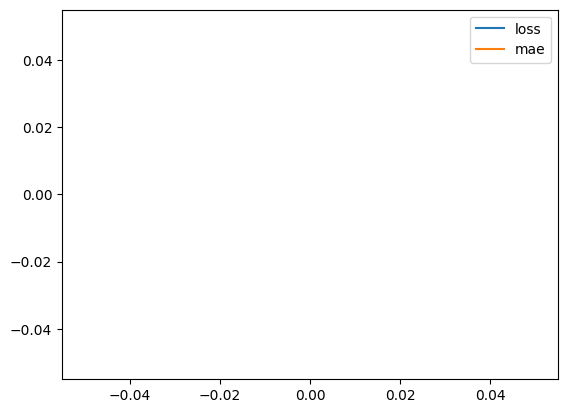

In [ ]:
pd.DataFrame(history.history).plot()

#Imporoving the Model

1. Add an extra layer
2. Train longer


In [ ]:
#set random seed
tf.random.set_seed(42)

#create Model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile Model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics =["mae"])
#Train Model
insurance_model_2.fit(X_train,y_train,epochs= 100, verbose =1)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 13272.1885 - mae: 13272.1885
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13120.5791 - mae: 13120.5791 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12810.6191 - mae: 12810.6191 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12196.0098 - mae: 12196.0098 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11137.9121 - mae: 11137.9121 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9724.2812 - mae: 9724.2812   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8330.1152 - mae: 8330.1152
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7552.4004 - mae: 7552.4004 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7418.3911 - mae: 7418.3911 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7389.8130 - mae: 7389.8130 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7368.1055 - mae: 7368.1055 
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
#Evaluate the lager mode
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4895.3687 - mae: 4895.3687


[4755.08154296875, 4755.08154296875]

In [ ]:
#Set seed
tf.random.set_seed(42)

# Create Model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#Compile Model
insurance_model_3.compile(
    optimizer = tf.optimizers.Adam(),
    loss = tf.losses.mae,
    metrics = ["mae"]
)
# fit the model
history_model_3 = insurance_model_3.fit(X_train,y_train,epochs = 200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13279.8428 - mae: 13279.8428
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13155.0059 - mae: 13155.0059 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12895.8418 - mae: 12895.8418 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12354.3643 - mae: 12354.3643 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11376.6191 - mae: 11376.6191 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9974.7070 - mae: 9974.7070  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8510.6406 - mae: 8510.6406 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7584.3789 - mae: 7584.3789 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7391.7261 - mae: 7391.7261 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7359.3716 - mae: 7359.3716 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7338.3901 - mae: 7338.3901 
Epoch 12/200
34/34 ━━━━━━━━━━━━

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3479.6399 - mae: 3479.6399


[3412.466064453125, 3412.466064453125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6914.8872 - mae: 6914.8872 


[6682.58837890625, 6682.58837890625]

Text(0.5, 0, 'epocs')

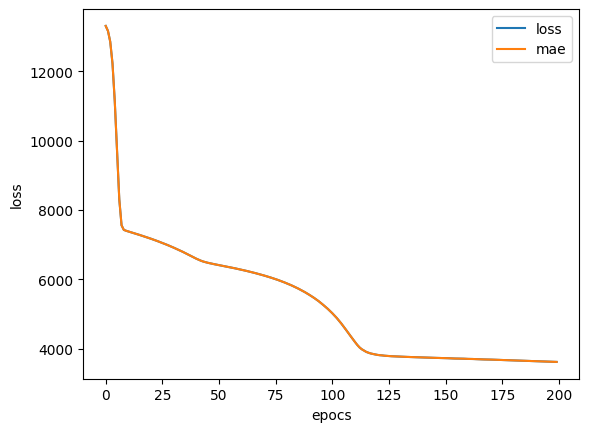

In [ ]:
# Plotting History (also now as Training Curve)

pd.DataFrame(history_model_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epocs")

#Preporcessing data (normalisation and standardization)

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

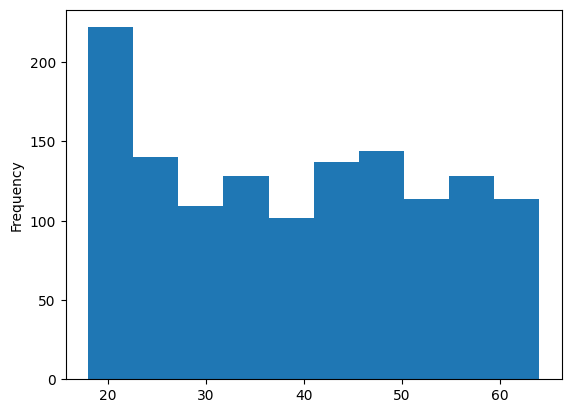

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

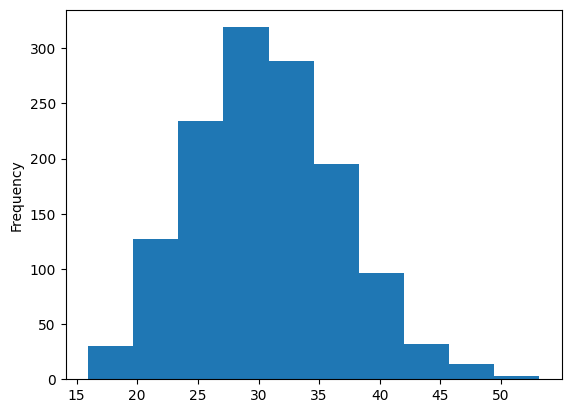

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a colum transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #scaling thise columns to 0-1
    (OneHotEncoder(handle_unknown= "ignore"),["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges",axis= 1)
y = insurance["charges"]

# Creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

# Fit the colum Transformer to our traing data
ct.fit(X_train)

#transfor training and Test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
#what does our data look like
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Check the Shapes
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#Build a model
#set randomness
tf.random.set_seed(42)

#Creat model
normalised_insurance_Model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#comple the model

normalised_insurance_Model.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]

)

#fit Model
history_NIM = normalised_insurance_Model.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13297.3828 - mae: 13297.3828
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13288.9980 - mae: 13288.9980 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13267.9160 - mae: 13267.9160 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13222.4512 - mae: 13222.4512
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13140.7754 - mae: 13140.7754 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13011.5146 - mae: 13011.5146
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12824.4814 - mae: 12824.4814 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12570.0176 - mae: 12570.0176 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12238.7031 - mae: 12238.7031
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11826.7744 - mae: 11826.7744 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11347.3506 - mae: 11347.3506 
Epoch 12/200
34/34 ━━━━

<Axes: >

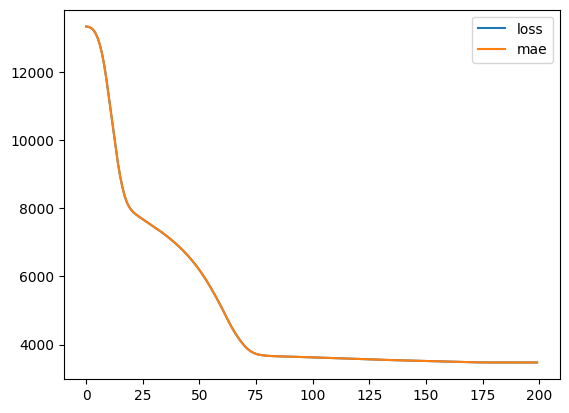

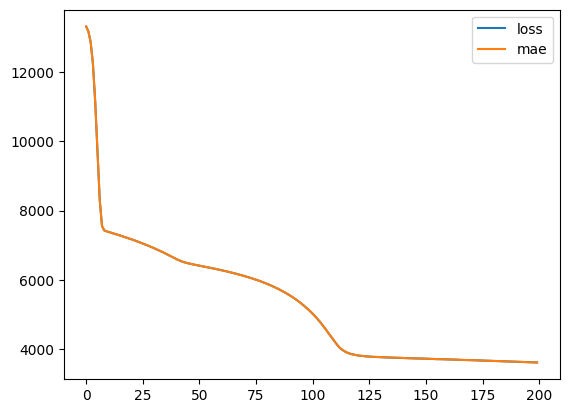

In [ ]:
pd.DataFrame(history_NIM.history).plot()
pd.DataFrame(history_model_3.history).plot()

In [ ]:
normalised_insurance_Model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3213.7839 - mae: 3213.7839


[3160.824462890625, 3160.824462890625]